# Import necessary libraries

In [4]:
#!pip install matplotlib
#!pip install seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Load the breast cancer dataset


In [7]:
data = load_breast_cancer()

In [8]:
X = data.data  # Features
y = data.target  # Target labels

In [9]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [10]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

# Preprocessing: 

In [15]:
#Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())  # No missing values in this dataset



Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [16]:
num_columns = data.data.shape[1]

In [17]:
print(f"Number of columns (features) in the dataset: {num_columns}")

Number of columns (features) in the dataset: 30


In [18]:
# Preprocessing: Scaling features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

In [19]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Correlation matrix plot

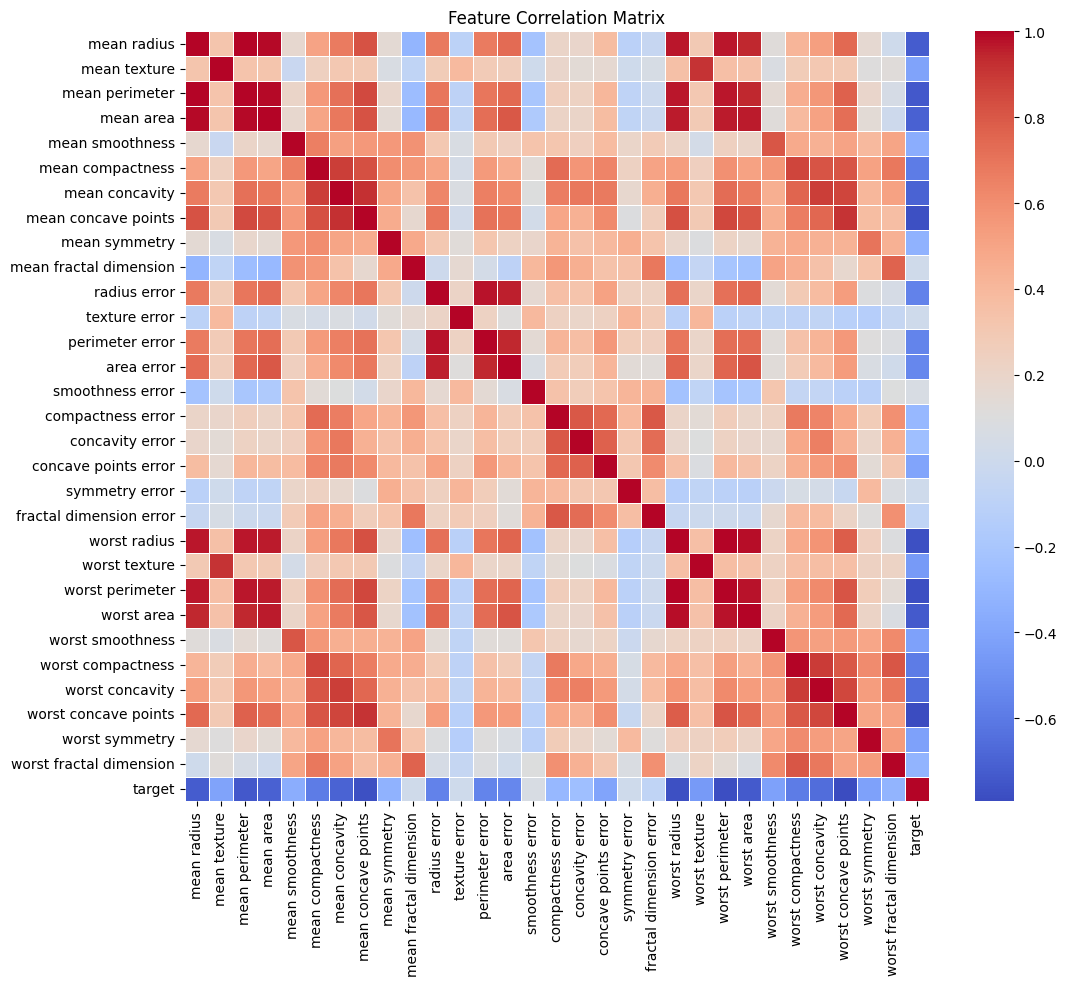

In [32]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Initialize the Support Vector Classifier (SVM model)

In [21]:
model = SVC(kernel='linear', random_state=42)

In [22]:
# Train the model on the training data
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [25]:
# Print the evaluation metrics
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 95.61%
Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [26]:
# PCA for 2D visualization (to plot data in 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot 1: PCA of data (2D projection)

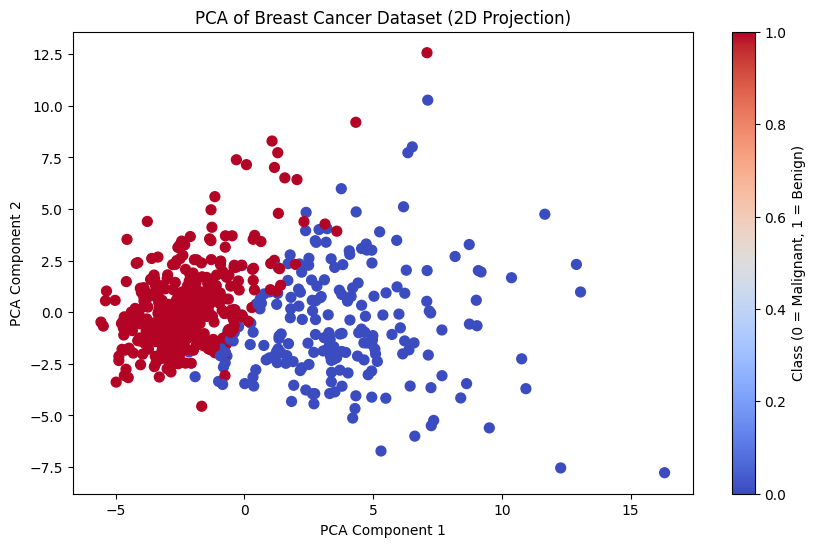

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50)
plt.title("PCA of Breast Cancer Dataset (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

# Plot 2: Heatmap of the Confusion Matrix

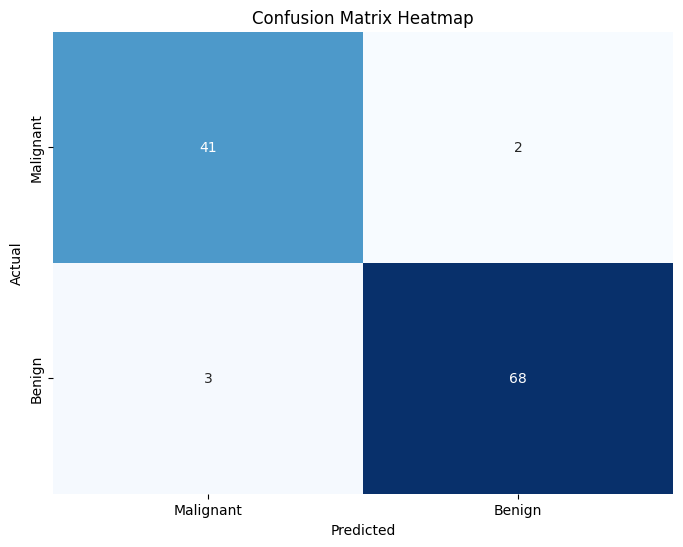

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot 3: Distribution of classes

C:\Users\fofoh\AppData\Local\Temp\ipykernel_4248\709889780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


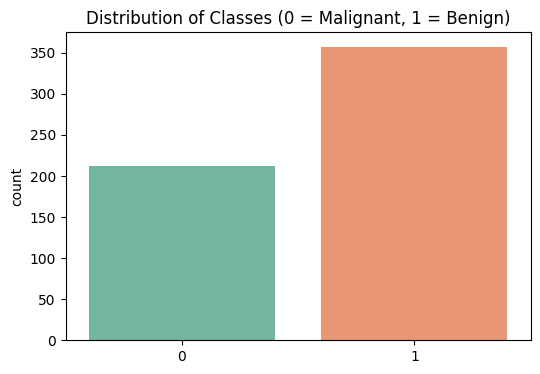

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title('Distribution of Classes (0 = Malignant, 1 = Benign)')
plt.show()

# Plot 4: Boxplot of one feature (e.g., mean radius) by class

C:\Users\fofoh\AppData\Local\Temp\ipykernel_4248\1558437457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=X[:, 0], palette='Set3')  # 'mean radius' feature


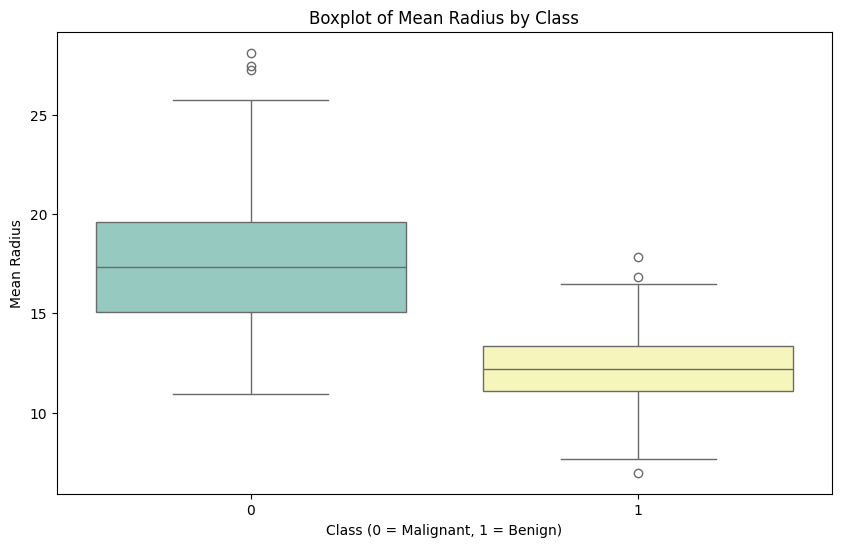

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X[:, 0], palette='Set3')  # 'mean radius' feature
plt.title('Boxplot of Mean Radius by Class')
plt.xlabel('Class (0 = Malignant, 1 = Benign)')
plt.ylabel('Mean Radius')
plt.show()